In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>First look at the data 

In [20]:
df = pd.read_csv('bank.csv')
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [21]:
df.shape

(11162, 17)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.0+ MB


In [23]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [24]:
df.describe().T

count         mean          std     min    25%    50%      75%  \
age       11162.0    41.231948    11.913369    18.0   32.0   39.0    49.00   
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00   
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00   
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00   
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75   
previous  11162.0     0.832557     2.292007     0.0    0.0    0.0     1.00   

              max  
age          95.0  
balance   81204.0  
day          31.0  
duration   3881.0  
campaign     63.0  
pdays       854.0  
previous     58.0

In [25]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

#### After function nunique() we can divide our data to categorical and numeric data

In [26]:
categorical = ['job', 'education','marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = ['age', 'balance', 'day', 'duration', 'previous']

## Data visualization

In [9]:
df.corr(method='pearson')

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.112300 -0.000762  0.000189 -0.005278  0.002774  0.020169
balance   0.112300  1.000000  0.010467  0.022436 -0.013894  0.017411  0.030805
day      -0.000762  0.010467  1.000000 -0.018511  0.137007 -0.077232 -0.058981
duration  0.000189  0.022436 -0.018511  1.000000 -0.041557 -0.027392 -0.026716
campaign -0.005278 -0.013894  0.137007 -0.041557  1.000000 -0.102726 -0.049699
pdays     0.002774  0.017411 -0.077232 -0.027392 -0.102726  1.000000  0.507272
previous  0.020169  0.030805 -0.058981 -0.026716 -0.049699  0.507272  1.000000

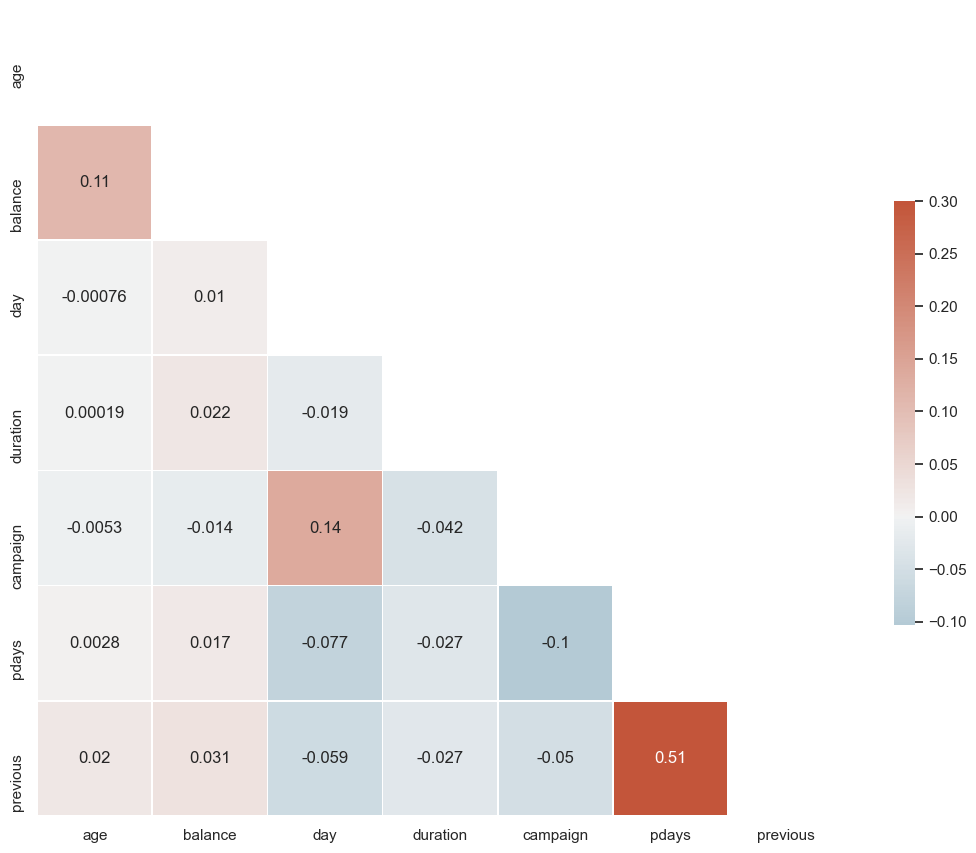

In [10]:
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(13, 11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=0.3, center=0, fmt=".2g",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

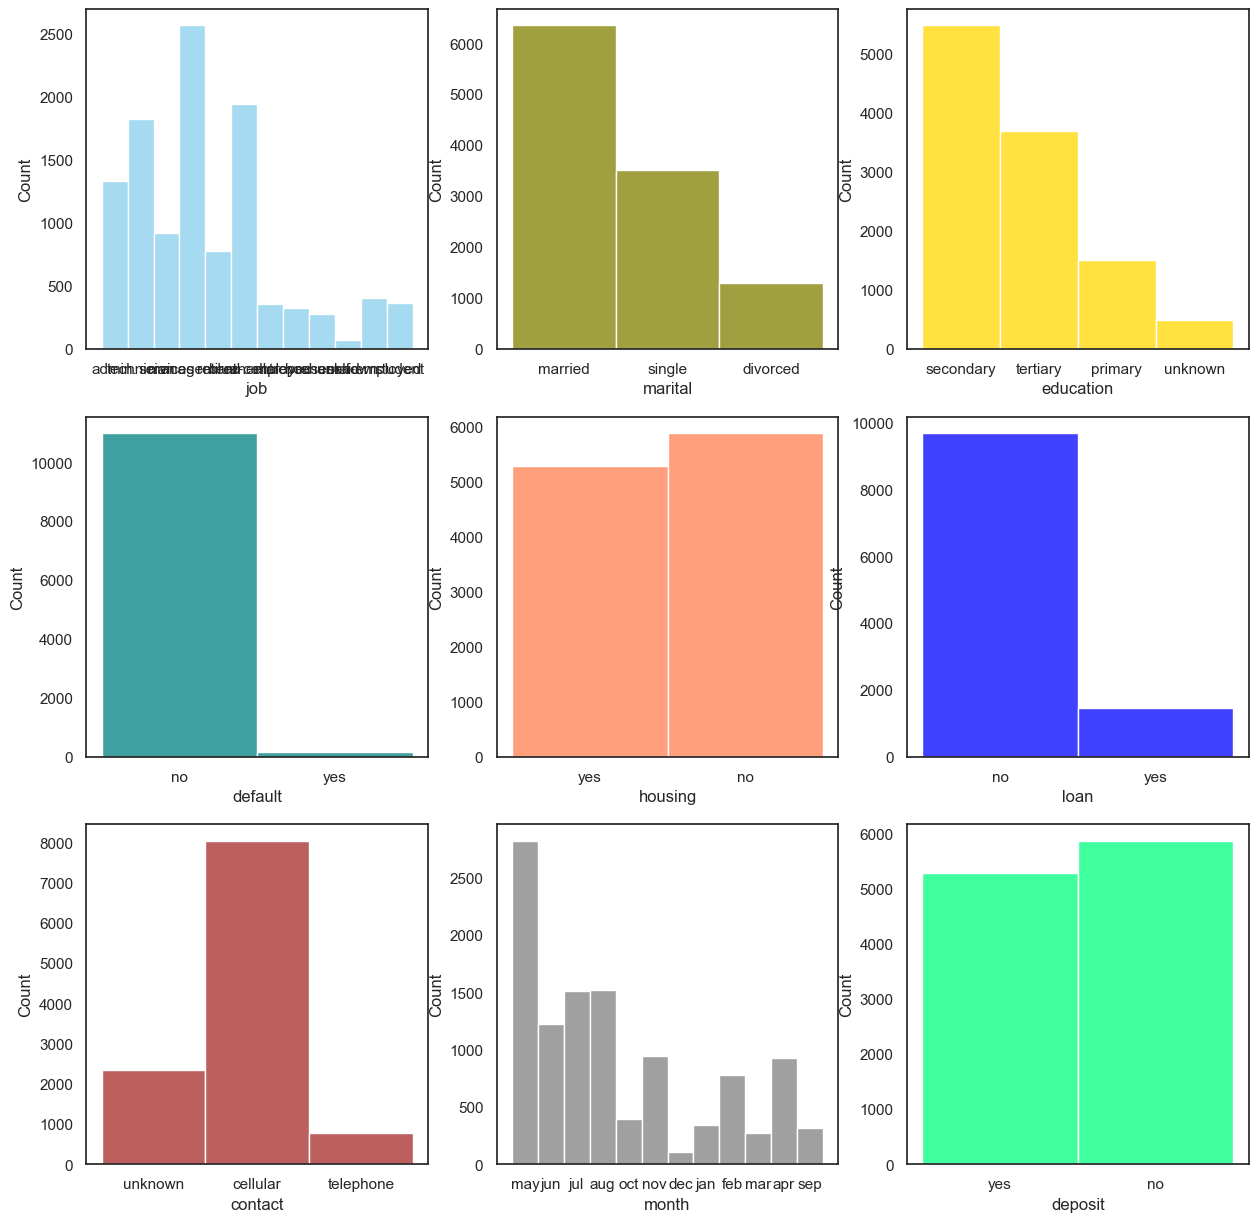

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
sns.histplot(data=df, x="job", color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="marital", color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="education", color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="default", color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="housing", color="coral", ax=axs[1, 1])
sns.histplot(data=df, x="loan", color="blue", ax=axs[1, 2])
sns.histplot(data=df, x="contact", color="brown", ax=axs[2, 0])
sns.histplot(data=df, x="month", color="gray", ax=axs[2, 1])
sns.histplot(data=df, x="deposit", color="springgreen", ax=axs[2, 2])
plt.show()

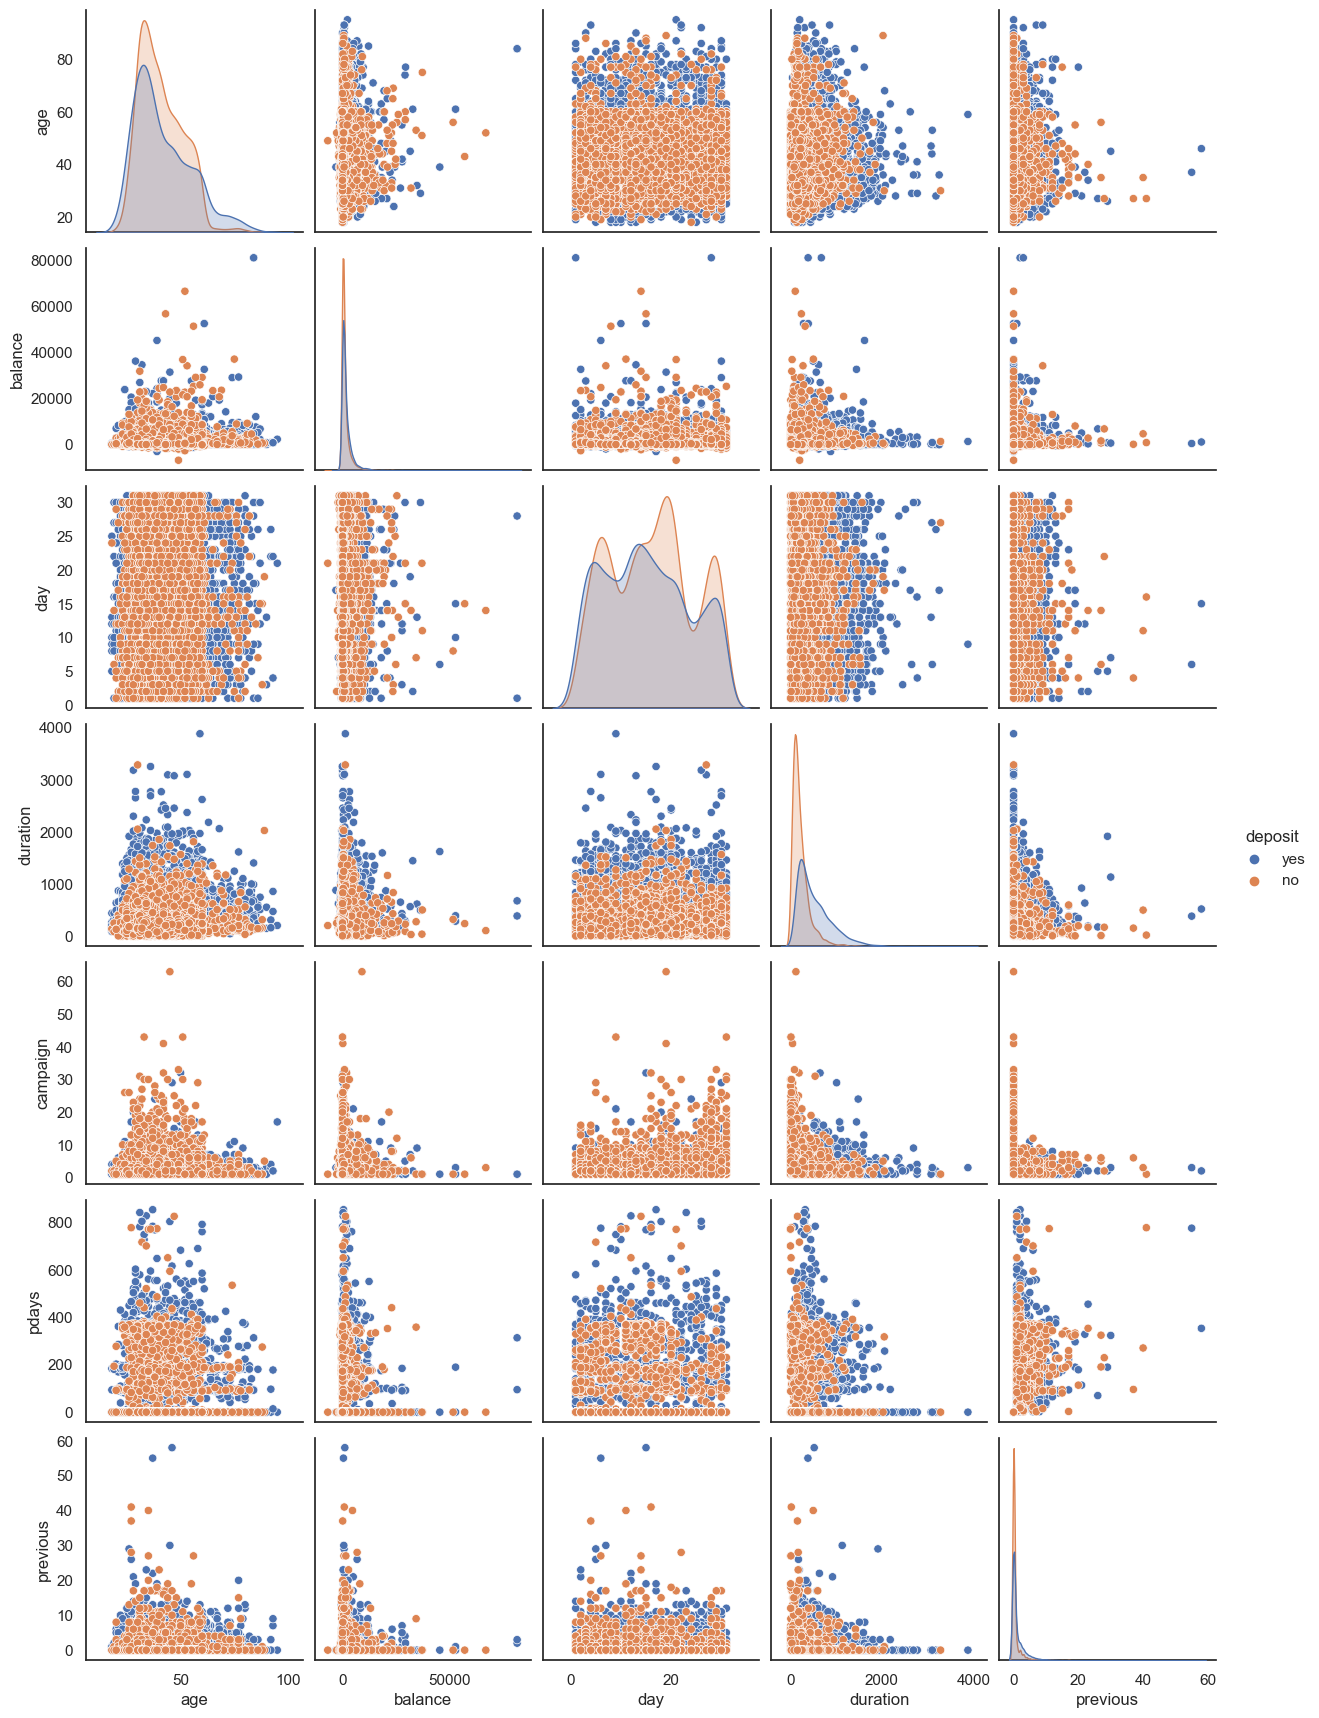

In [35]:
sns.pairplot(data=df, x_vars=numerical, hue='deposit')
plt.show()

## Encoding categorical data

In [27]:
df['deposit'] = df['deposit'].str.replace('yes', '1')
df['deposit'] = df['deposit'].str.replace('no', '0')

In [28]:
df['deposit'] = df['deposit'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 1.1+ MB


In [29]:
df = pd.get_dummies(df, columns=categorical).drop(['pdays'], axis=1)
df.head()

age  balance  day  duration  campaign  previous  deposit  job_admin.  \
0   59     2343    5      1042         1         0        1           1   
1   56       45    5      1467         1         0        1           1   
2   41     1270    5      1389         1         0        1           0   
3   55     2476    5       579         1         0        1           0   
4   54      184    5       673         2         0        1           1   

   job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  month_may  \
0                0                 0  ...          0          0          1   
1                0                 0  ...          0          0          1   
2                0                 0  ...          0          0          1   
3                0                 0  ...          0          0          1   
4                0                 0  ...          0          0          1   

   month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0          0          0          0                 0               0   
1          0          0          0                 0               0   
2          0          0          0                 0               0   
3          0          0          0                 0               0   
4          0          0          0                 0               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  
1                 0                 1  
2                 0                 1  
3                 0                 1  
4                 0                 1  

[5 rows x 51 columns]

In [40]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'deposit',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

## Machine Learning for Classification

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
X=df.drop('deposit',axis=1)
y=df['deposit']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Machine Learning for Regression

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
X=df.drop('balance',axis=1)
y=df['balance']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### KNeighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier()

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_preds = knn.predict(X_test)

In [19]:
target_names = ['yes', 'no']

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, y_preds))

[[1320  440]
 [ 503 1086]]


In [22]:
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.72      0.75      0.74      1760
          no       0.71      0.68      0.70      1589

    accuracy                           0.72      3349
   macro avg       0.72      0.72      0.72      3349
weighted avg       0.72      0.72      0.72      3349



#### As we can see, our data coped quite well when saving the default data, then we will try to change the parameters 

In [23]:
knn = KNeighborsClassifier(n_neighbors=7)

In [24]:
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.73      0.75      0.74      1760
          no       0.72      0.69      0.70      1589

    accuracy                           0.72      3349
   macro avg       0.72      0.72      0.72      3349
weighted avg       0.72      0.72      0.72      3349



#### Our model improved with an increase in the number of neighbors, the accuracy of prediction increased and how much he correctly learned among the rest ...

In [25]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.73      0.76      0.74      1760
          no       0.72      0.68      0.70      1589

    accuracy                           0.72      3349
   macro avg       0.72      0.72      0.72      3349
weighted avg       0.72      0.72      0.72      3349



#### The model was not improved so, he only changed the principle, he started to predict those who have a deposit and not those who do not, which means increasing the number of neighbors further on whether we can get a better model

In [26]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.72      0.75      0.74      1760
          no       0.71      0.68      0.70      1589

    accuracy                           0.72      3349
   macro avg       0.72      0.72      0.72      3349
weighted avg       0.72      0.72      0.72      3349



#### The model did not become better considering the distance more precisely so that the model distinguishes the class by distance, considering the weight by percentage, it is still better 

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
X=df.drop('balance',axis=1)
y=df['balance']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
knn = KNeighborsRegressor()

In [36]:
score=knn.score(X_test, y_test)
print(score)
0.5777770279320101
 
mse =mean_squared_error(y_test, y_preds)
print("Mean Squared Error:",mse)
 
rmse = r2_score(y_test, y_preds)
print("Root Mean Squared Error:", rmse)

-0.17431885074218978
Mean Squared Error: 11075315.272594804
Root Mean Squared Error: -0.17431885074218978


In [44]:
knn = KNeighborsRegressor(n_neighbors=7, weights='distance')

In [46]:
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
score=knn.score(X_test, y_test)
print(score)
0.5777770279320101
 
mse =mean_squared_error(y_test, y_preds)
print("Mean Squared Error:",mse)
 
rmse = r2_score(y_test, y_preds)
print("Root Mean Squared Error:", rmse)

-0.1254835294116412
Mean Squared Error: 10614736.291143162
Root Mean Squared Error: -0.1254835294116412


In [47]:
knn = KNeighborsRegressor(n_neighbors=7)

In [48]:
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
score=knn.score(X_test, y_test)
print(score)
0.5777770279320101
 
mse =mean_squared_error(y_test, y_preds)
print("Mean Squared Error:",mse)
 
rmse = r2_score(y_test, y_preds)
print("Root Mean Squared Error:", rmse)

-0.11458587980340318
Mean Squared Error: 10511957.64200096
Root Mean Squared Error: -0.11458587980340318


#### The situation is very similar to classification, the model understands best when the weight of the data does not depend on distance and it is best to leave them equal, plus as the number of neighbors increases, it understands better 

### Support Vector Machines

In [15]:
from sklearn.svm import SVC, SVR

In [31]:
svc = SVC()

In [32]:
svc.fit(X_train, y_train)

SVC()

In [33]:
y_preds = svc.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(confusion_matrix(y_test, y_preds))

[[1477  283]
 [ 633  956]]


In [36]:
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.70      0.84      0.76      1760
          no       0.77      0.60      0.68      1589

    accuracy                           0.73      3349
   macro avg       0.74      0.72      0.72      3349
weighted avg       0.73      0.73      0.72      3349



#### With default parameters, our data learned quite normally, the only problem is that our model began to better distinguish between representatives who have a deposit, which is not entirely correct

In [37]:
svc = SVC(kernel='poly')

In [38]:
svc.fit(X_train, y_train)

SVC(kernel='poly')

In [39]:
y_preds = svc.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.56      0.98      0.71      1760
          no       0.86      0.15      0.26      1589

    accuracy                           0.59      3349
   macro avg       0.71      0.57      0.49      3349
weighted avg       0.70      0.59      0.50      3349



#### Since although he predicted those who have a deposit of 98 percent, but among all the data on how much he correctly guessed, 56 percent will be not entirely pleasant news, but despite the fact that he guessed only 15 percent, they turned out to be 86 percent correct, which cannot please . This method was applied to check how the model will behave.

But there is a big but to build a better model, I will continue to use the kernel = 'RBF' method since our data is located between other data and using a three-dimensional distribution they will better understand 

In [16]:
svc = SVC(gamma='scale', decision_function_shape='ovr', class_weight='balanced')

In [17]:
svc.fit(X_train, y_train)

SVC(class_weight='balanced')

In [20]:
y_preds = svc.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.71      0.81      0.76      1760
          no       0.75      0.64      0.69      1589

    accuracy                           0.73      3349
   macro avg       0.73      0.73      0.73      3349
weighted avg       0.73      0.73      0.73      3349



#### By balancing the weight of our data, our data will be more correctly determined by the model that you can see, the model has become better able to distinguish between those who did not have a deposit, while those who have it, although they became worse by 3 percent, but at the same time, by 71 percent, he accurately found correctly from all data of this class 

### SVR

In [38]:
svr = SVR()

In [39]:
svr.fit(X_train, y_train)

SVR()

In [41]:
y_preds = svr.predict(X_test)
score=svr.score(X_test, y_test)
print(score)
 
mse = mean_squared_error(y_test, y_preds)
print("Mean Squared Error:",mse)
 
rmse = r2_score(y_test, y_preds)
print("Root Mean Squared Error:", rmse)

-0.10110011951485776
Mean Squared Error: 10384769.828578835
Root Mean Squared Error: -0.10110011951485776


In [42]:
svr = SVR(kernel='poly')

In [43]:
svr.fit(X_train, y_train)

SVR(kernel='poly')

In [44]:
y_preds = svr.predict(X_test)
score=svr.score(X_test, y_test)
print(score)
 
mse = mean_squared_error(y_test, y_preds)
print("Mean Squared Error:",mse)
 
rmse = r2_score(y_test, y_preds)
print("Root Mean Squared Error:", rmse)

-0.10160001385865614
Mean Squared Error: 10389484.465882882
Root Mean Squared Error: -0.10160001385865614


#### Not very noticeable changes, but if you look closely, there are only more errors 

In [54]:
svr = SVR(shrinking=False, verbose=True)

In [55]:
svr.fit(X_train, y_train)

[LibSVM]

SVR(shrinking=False, verbose=True)

In [56]:
y_preds = svr.predict(X_test)
score=svr.score(X_test, y_test)
print(score)
 
mse = mean_squared_error(y_test, y_preds)
print("Mean Squared Error:",mse)
 
rmse = r2_score(y_test, y_preds)
print("Root Mean Squared Error:", rmse)

-0.1011000863131939
Mean Squared Error: 10384769.515445061
Root Mean Squared Error: -0.1011000863131939


### As can be seen from the attempts to change the parameters, the default parameters did the best job for this model. 

### Decision Tree

In [42]:
features = df[['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']]

In [ ]:
features_name = ['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']

In [46]:
target = df.deposit

### Decision Tree Classifier

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
from sklearn.tree import plot_tree

In [56]:
tree = DecisionTreeClassifier()

In [57]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_preds = tree.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.81      0.81      0.81      1760
          no       0.79      0.79      0.79      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



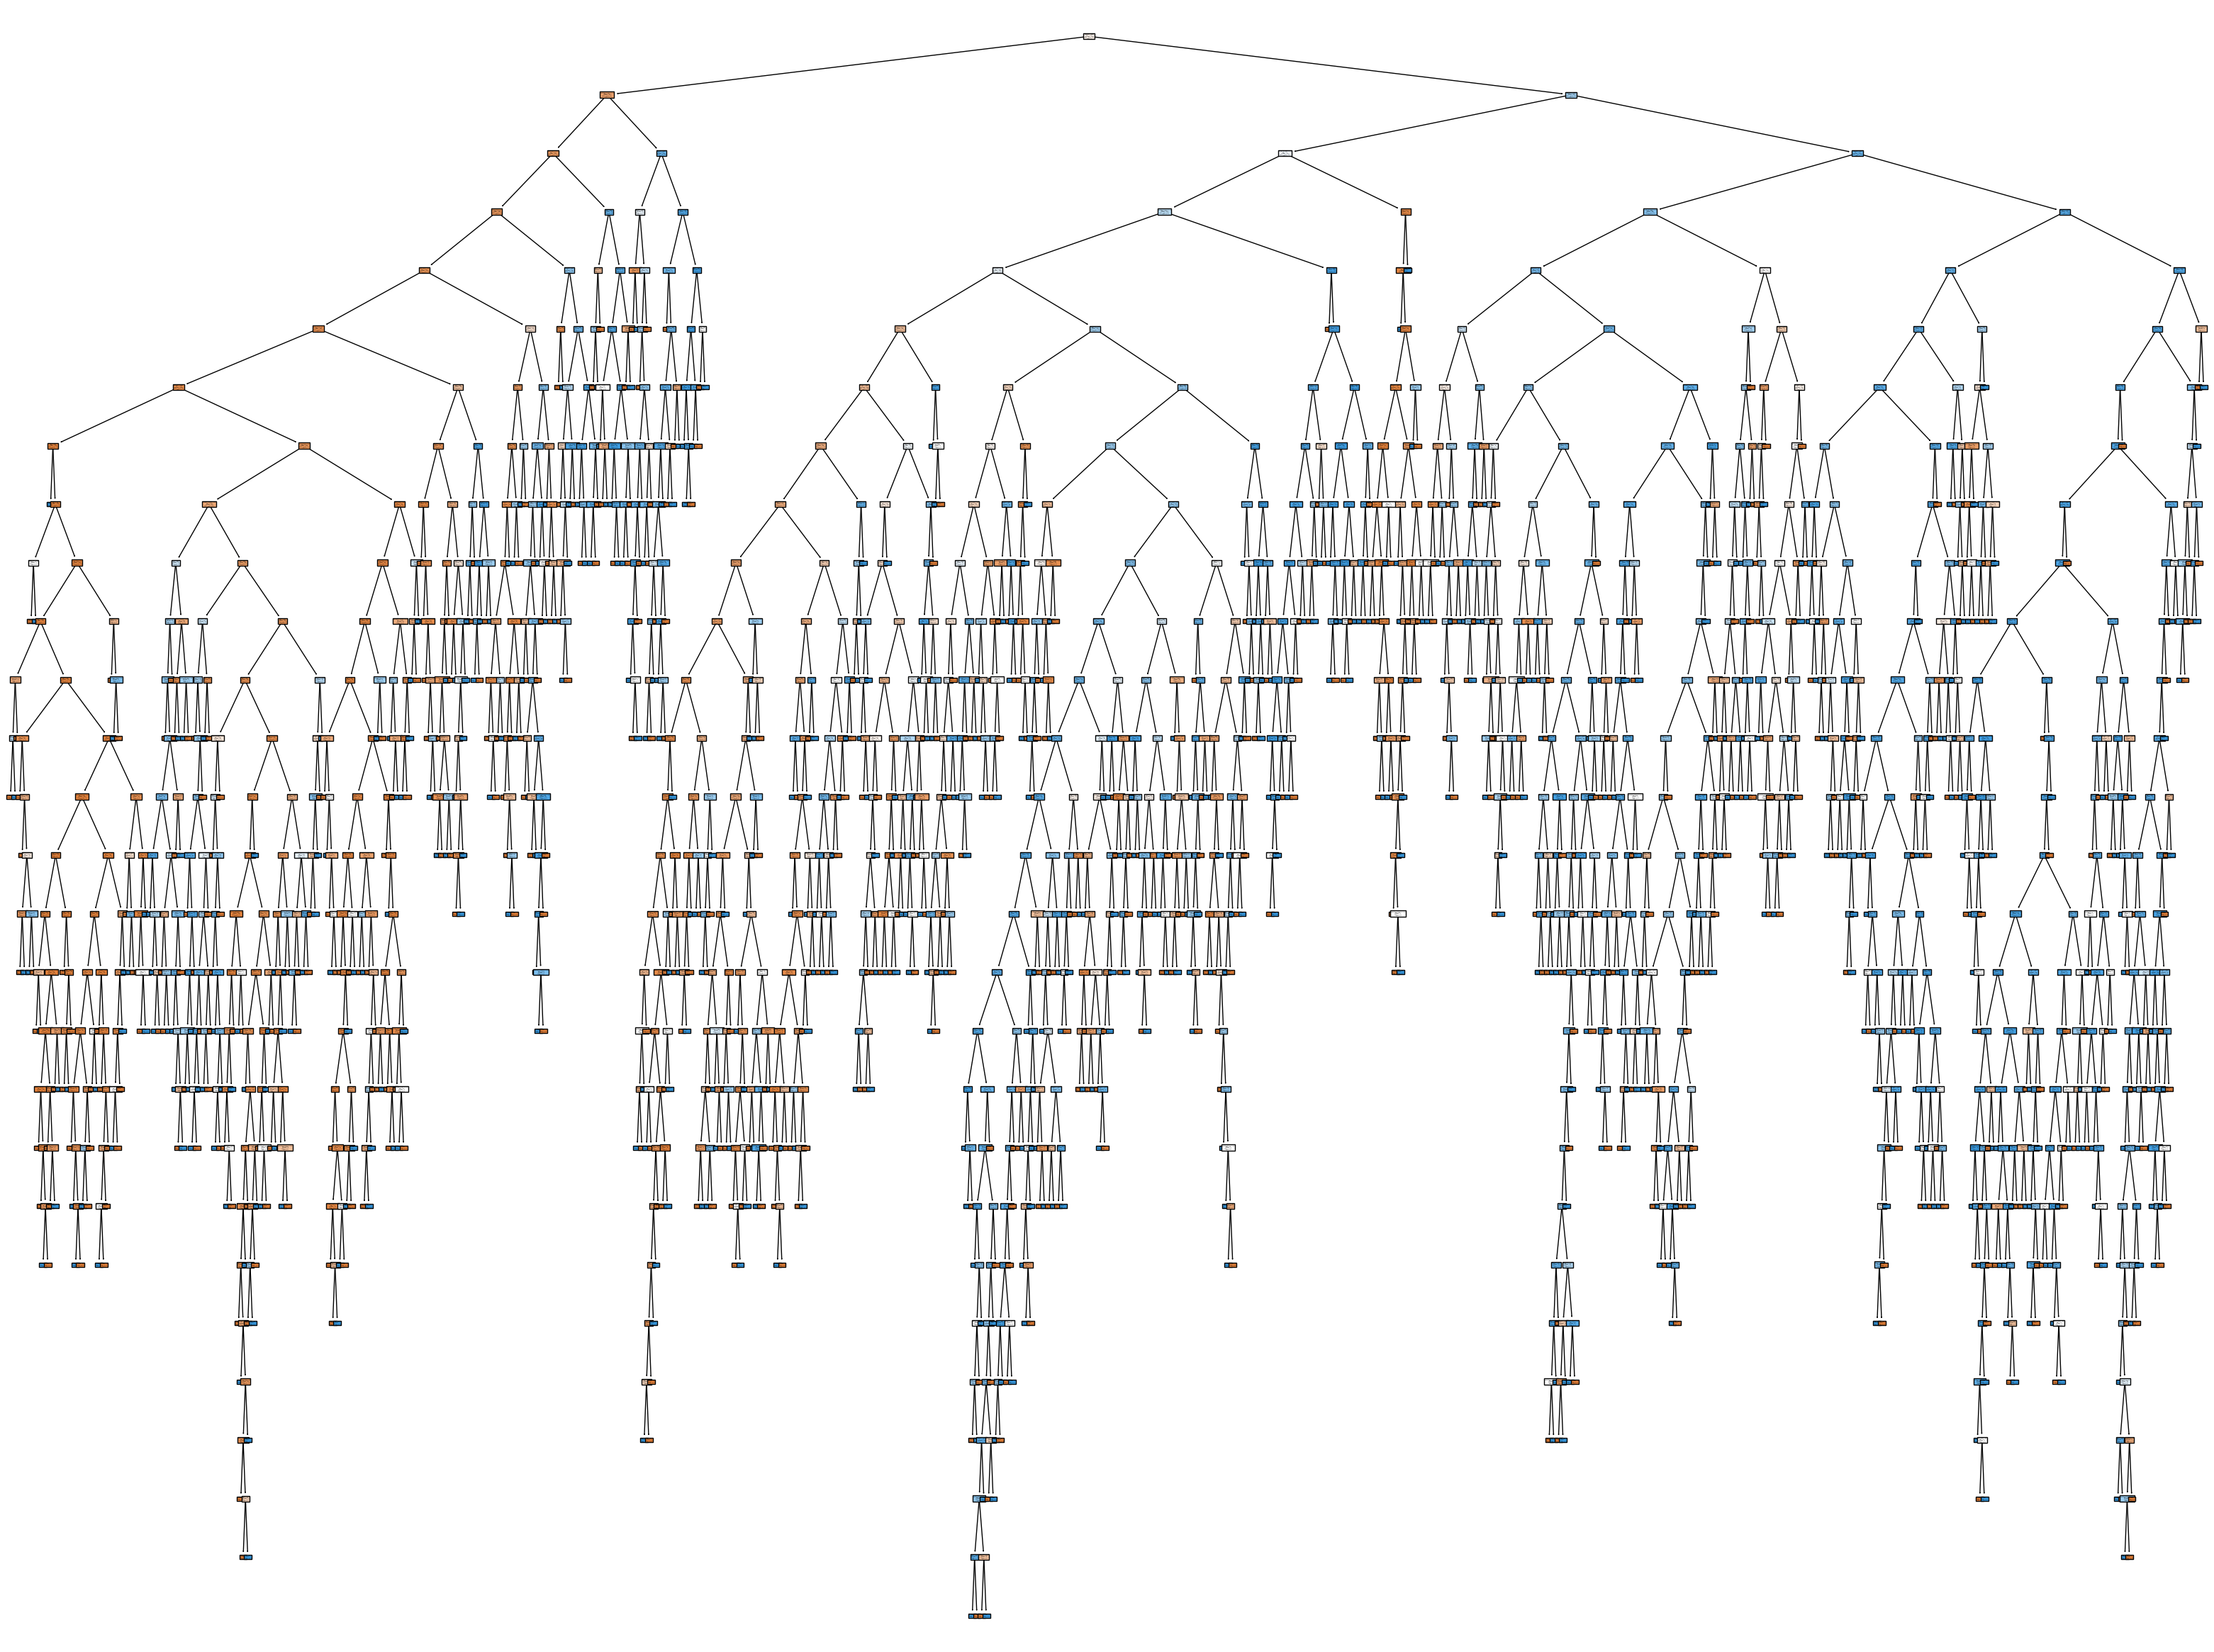

In [59]:
fig = plt.figure(figsize=(40,30))
_ = plot_tree(tree,
                   feature_names=features.columns,
                   class_names=target.astype(str),
                   filled=True)
plt.show()

In [52]:
tree = DecisionTreeClassifier(max_depth=19)

In [53]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=19)

In [54]:
y_preds = tree.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.82      0.82      0.82      1760
          no       0.80      0.80      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



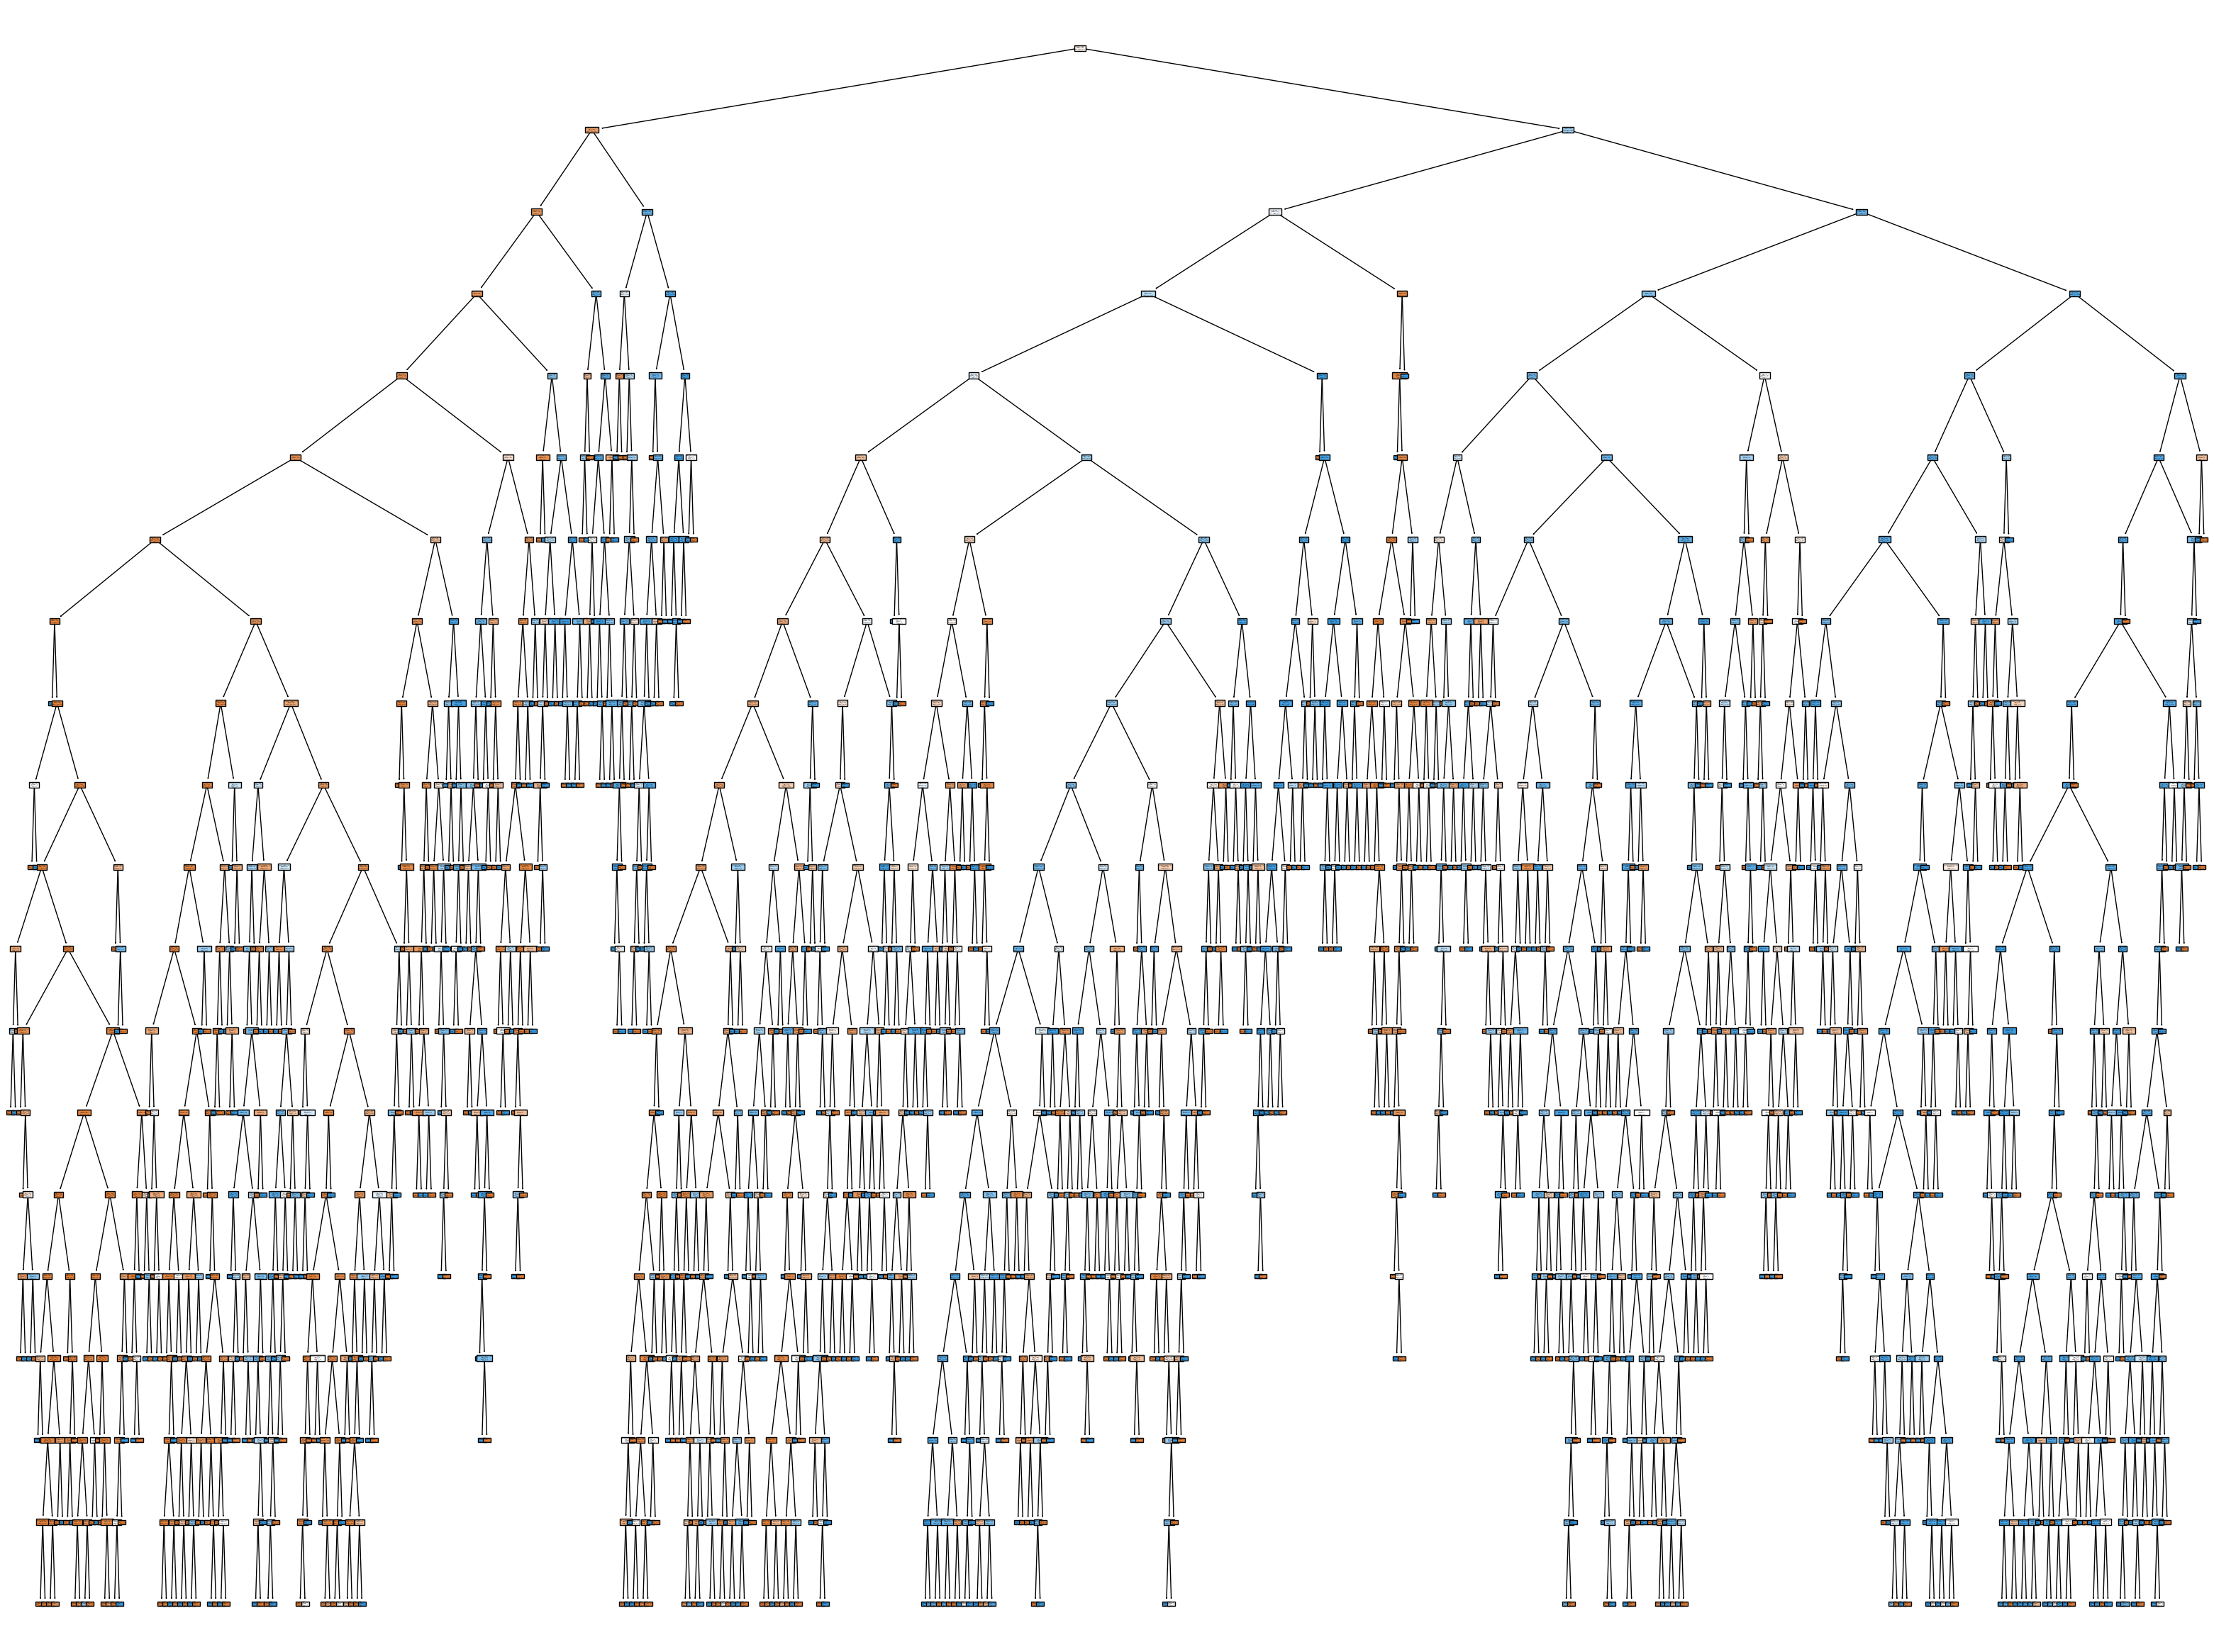

In [55]:
fig = plt.figure(figsize=(40,30))
_ = plot_tree(tree,
                   feature_names=features.columns,
                   class_names=target.astype(str),
                   filled=True)
plt.show()

In [64]:
tree = DecisionTreeClassifier(max_depth=19, min_samples_split=4)

In [65]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=19, min_samples_split=4)

In [66]:
y_preds = tree.predict(X_test)
target_names = ['yes', 'no']
print(classification_report(y_test, y_preds, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.82      0.82      0.82      1760
          no       0.80      0.80      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



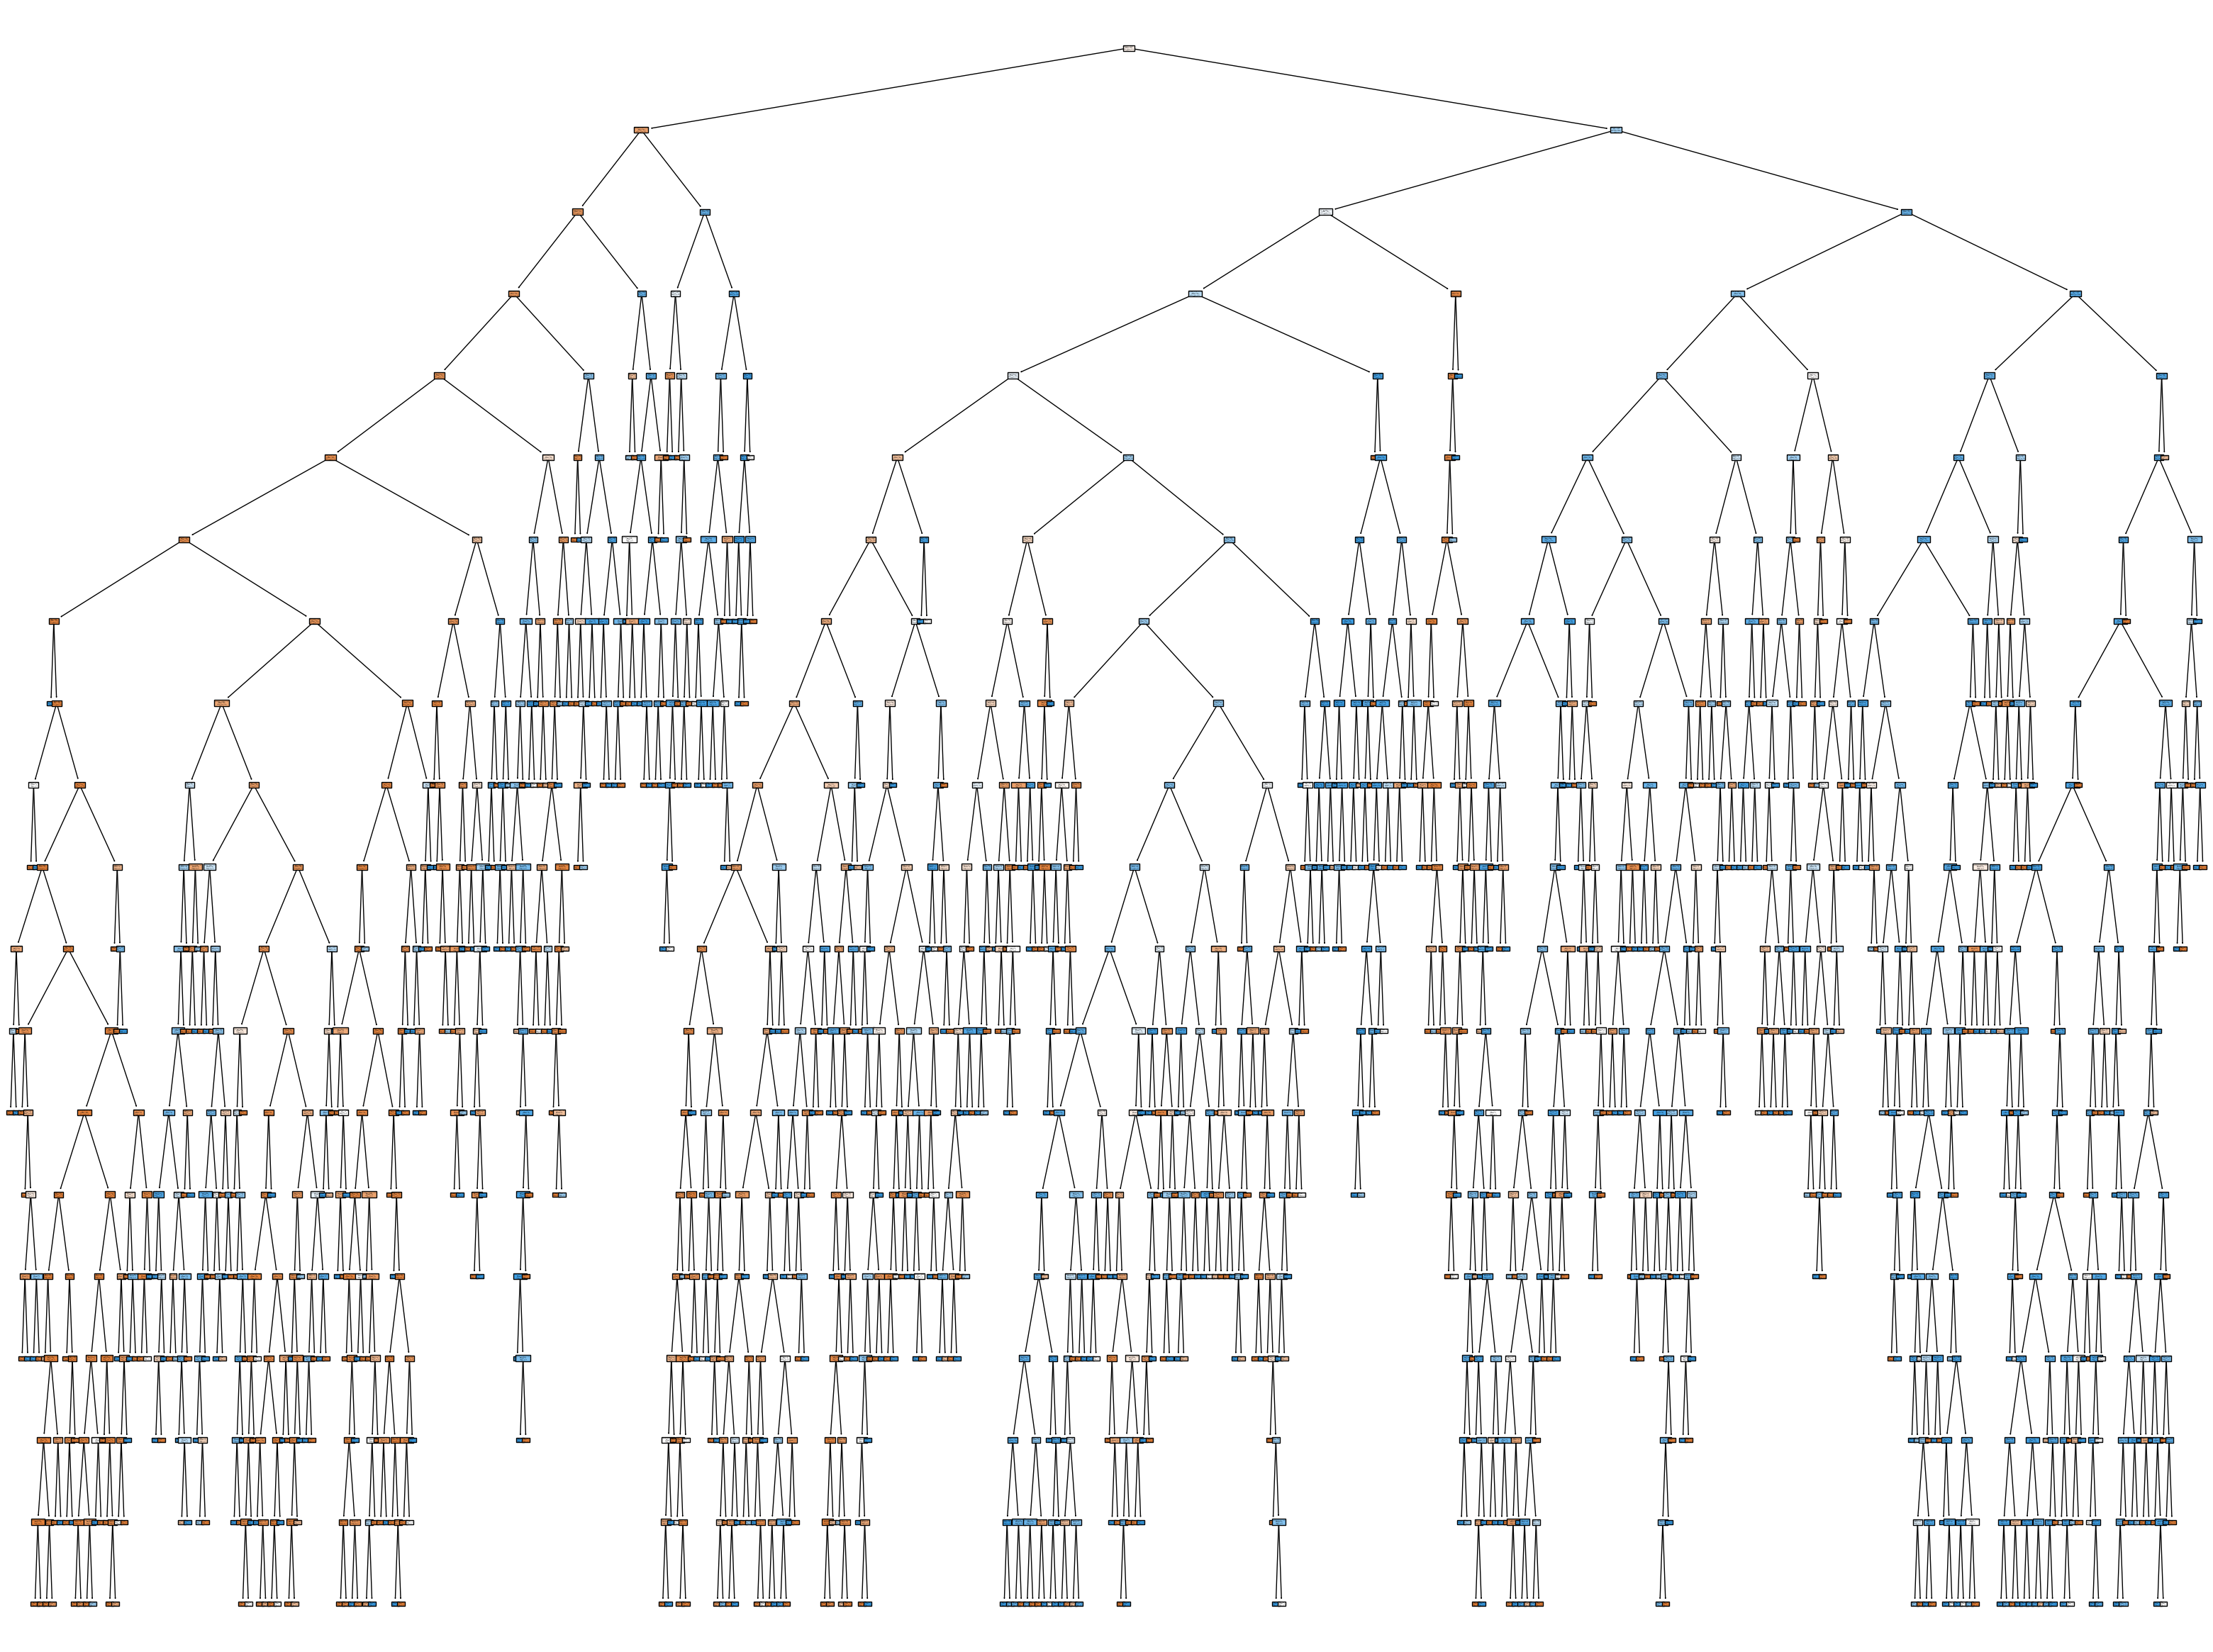

In [67]:
fig = plt.figure(figsize=(40,30))
_ = plot_tree(tree,
                   feature_names=features.columns,
                   class_names=target.astype(str),
                   filled=True)
plt.show()

### Decision Tree Regressor

In [2]:
from sklearn.tree import DecisionTreeRegressor